In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_reviews = pd.read_csv('reviews.csv')

In [5]:
print("The dataset has {} rows and {} columns.".format(*df_reviews.shape))
print("It contains {} duplicates.".format(df_reviews.duplicated().sum()))

The dataset has 1434052 rows and 6 columns.
It contains 0 duplicates.


In [6]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and..."
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...
2,11551,41044,2010-05-09,104133,Chase,Adriano was a fantastic host. We felt very at ...
3,11551,48926,2010-06-01,122714,John & Sylvia,We had a most wonderful stay with Adriano and ...
4,11551,58352,2010-06-28,111543,Monique,I'm not sure which of us misunderstood the s...


In [7]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20190914144451,2019-09-15,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.59
1,13913,https://www.airbnb.com/rooms/13913,20190914144451,2019-09-15,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,3,1,2,0,0.14
2,15400,https://www.airbnb.com/rooms/15400,20190914144451,2019-09-15,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,t,f,strict_14_with_grace_period,t,t,1,1,0,0,0.73
3,17402,https://www.airbnb.com/rooms/17402,20190914144451,2019-09-15,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,none,"Location, location, location! You won't find b...",...,t,f,strict_14_with_grace_period,f,f,15,15,0,0,0.40
4,24328,https://www.airbnb.com/rooms/24328,20190914144451,2019-09-15,Battersea bedroom & office w parking shared ga...,"Artist house, bright high ceiling rooms, priva...",- End of terrace two bedroom house close to So...,"Artist house, bright high ceiling rooms, priva...",family,"- Battersea is a quiet family area, easy acces...",...,f,f,moderate,t,t,1,1,0,0,0.86


In [8]:
df = pd.merge(df_reviews, df_listings[['latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [9]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,latitude,longitude,number_of_reviews,property_type
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and...",51.46225,-0.11732,184,Apartment
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...,51.46225,-0.11732,184,Apartment
2,11551,41044,2010-05-09,104133,Chase,Adriano was a fantastic host. We felt very at ...,51.46225,-0.11732,184,Apartment
3,11551,48926,2010-06-01,122714,John & Sylvia,We had a most wonderful stay with Adriano and ...,51.46225,-0.11732,184,Apartment
4,11551,58352,2010-06-28,111543,Monique,I'm not sure which of us misunderstood the s...,51.46225,-0.11732,184,Apartment


In [10]:
df.isna().sum()

listing_id             0
id                     0
date                   0
reviewer_id            0
reviewer_name          0
comments             566
latitude               0
longitude              0
number_of_reviews      0
property_type          0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
from cld2 import detect

In [13]:
def language_detection(text):
    try:
        return detect(text).details[0][1]
    except:
        return None

In [14]:
df['language'] = df['comments'].apply(language_detection)

In [15]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,latitude,longitude,number_of_reviews,property_type,language
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and...",51.46225,-0.11732,184,Apartment,en
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...,51.46225,-0.11732,184,Apartment,en
2,11551,41044,2010-05-09,104133,Chase,Adriano was a fantastic host. We felt very at ...,51.46225,-0.11732,184,Apartment,en
3,11551,48926,2010-06-01,122714,John & Sylvia,We had a most wonderful stay with Adriano and ...,51.46225,-0.11732,184,Apartment,en
4,11551,58352,2010-06-28,111543,Monique,I'm not sure which of us misunderstood the s...,51.46225,-0.11732,184,Apartment,en


In [16]:
df.language.value_counts().head(10)

en    1233064
fr      65424
es      32690
un      22815
de      22732
it      15515
zh      10142
ko       8246
pt       5542
nl       4160
Name: language, dtype: int64

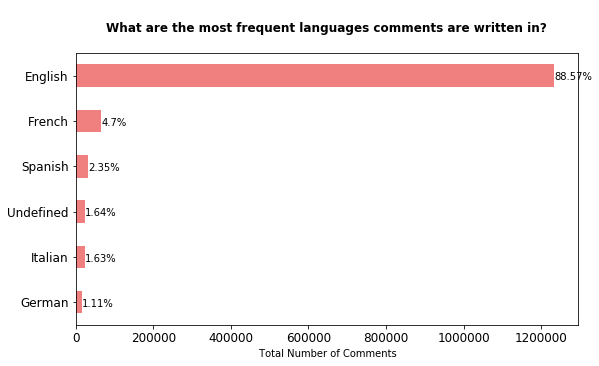

In [17]:
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Spanish', 'Undefined', 'Italian', 'German'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

In [18]:
df_eng = df[(df['language']=='en')]

In [66]:
df_eng['comments'] = df_eng['comments'].str.replace("[^a-zA-Z#]", " ")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
negations = ['no', 'not', "isn't", "haven't", "didn't", "hasn't", "never", "won't", "couldn't"]
stop_words = list(set(stop_words) - set(negations))

In [74]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df_eng['comments'] = df_eng['comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df_eng['comments']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [83]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, negations, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags or token.lemma_ in negations])
    return output

In [84]:
reviews[1]

'stayed adriano valerio week first moving london the apartment great clean compared lot places seen london situated close brixton tube good bus links central london thanks guys'

In [85]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['stayed', 'adriano', 'valerio', 'week', 'first', 'moving', 'london', 'the', 'apartment', 'great', 'clean', 'compared', 'lot', 'places', 'seen', 'london', 'situated', 'close', 'brixton', 'tube', 'good', 'bus', 'links', 'central', 'london', 'thanks', 'guys']


In [ ]:
reviews_2 = lemmatization(tokenized_reviews, negations)

In [87]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df_eng['comments'] = reviews_3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [131]:
for i in range(len(negations)):
    word = negations[i]
    negations[i] = ' ' + word + ' '

In [133]:
for word in negations:
    df_eng = df_eng[~df_eng['comments'].str.contains(word, na=False)]

In [135]:
len(df_eng)

1098120

In [98]:
del df_eng['language']

In [137]:
df_eng.to_csv(r'processed_reviews.csv')